In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pandas as pd

# Modèle de resistivité quelconque 

## Exemple de sol avec des resistivité aléatoires

In [2]:
map_res = np.empty((30, 200), dtype='float')
map_res[0:10,:] = 50
map_res[10:20,:] = 200
map_res[20:30,:] = 100 # discretisation du sol en trois couches (resistivités quelconques ?)

Représentation graphique :

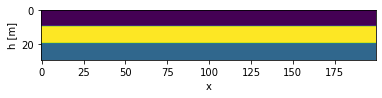

In [3]:
plt.imshow(map_res);
plt.xlabel('x'); plt.ylabel('h [m]');

## Modèle 1D 

In [4]:
x = 98 # position x ou se fera le modèle
noise_em = 1 # bruit
nlay = 40 # nombre de couches
thickness = 1
thk = pg.Vector(nlay - 1, thickness) # en premier le nombre de couche -1, en deuxième l'épasseur en m
center = np.cumsum(thk) - thk/2 # centroïde des couches

In [5]:
# Partie pas comprise ou je me suis fais aidé :

res_em = np.ones(nlay)*map_res[0, x]

for i in center:
    if i < 30:
        ab = 29-np.round((i-0.01)).astype(int)
        ab2 = np.floor(i/thickness).astype(int)
        res_em[ab2] = map_res[ab, x]

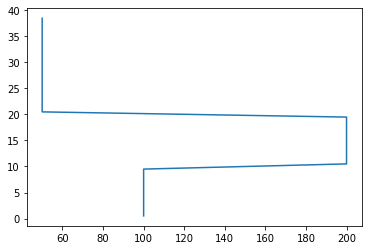

In [6]:
model = pg.cat(thk, res_em)
noise_em = 1

plt.plot(np.array(res_em)[:-1], np.array(center));

In [7]:
model.array()

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,
        50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,
        50.,  50.])

## Modèle forward

In [8]:
space_coil = 10; nf = 10; freq = pg.Vector(nf)
freq = pd.read_excel('freq.xlsx')
freq = np.array(freq)

In [9]:
fEM = pg.core.FDEM1dModelling(nlay, freq, space_coil)
dataEM= fEM(model)

#for i in range(len(dataEM)):
#    dataEM[i]+=np.random.random(1)[0]*0

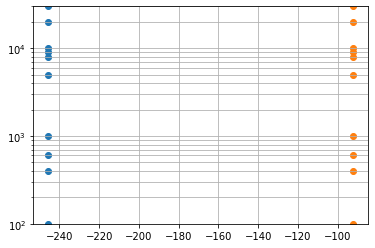

In [10]:
plt.scatter(dataEM[0:nf], freq)
plt.scatter(dataEM[nf:nf*2], freq)
plt.yscale('log')
plt.ylim((min(freq), max(freq)))
plt.grid(which='both')

In [11]:
data_fEM = pg.physics.em.FDEM(x=[1], freqs=freq, coilSpacing=space_coil)
fOP = pg.core.FDEM1dRhoModelling(center, data_fEM.freq(), data_fEM.coilSpacing, -data_fEM.height)
dataEM= pd.DataFrame(fOP(res_em))

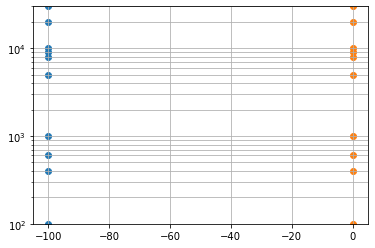

In [12]:
plt.scatter(dataEM[:nf], freq)
plt.scatter(dataEM[nf:nf*2], freq)
plt.yscale('log')
plt.ylim((min(freq), max(freq)))
plt.grid(which='both')